# Archery Target

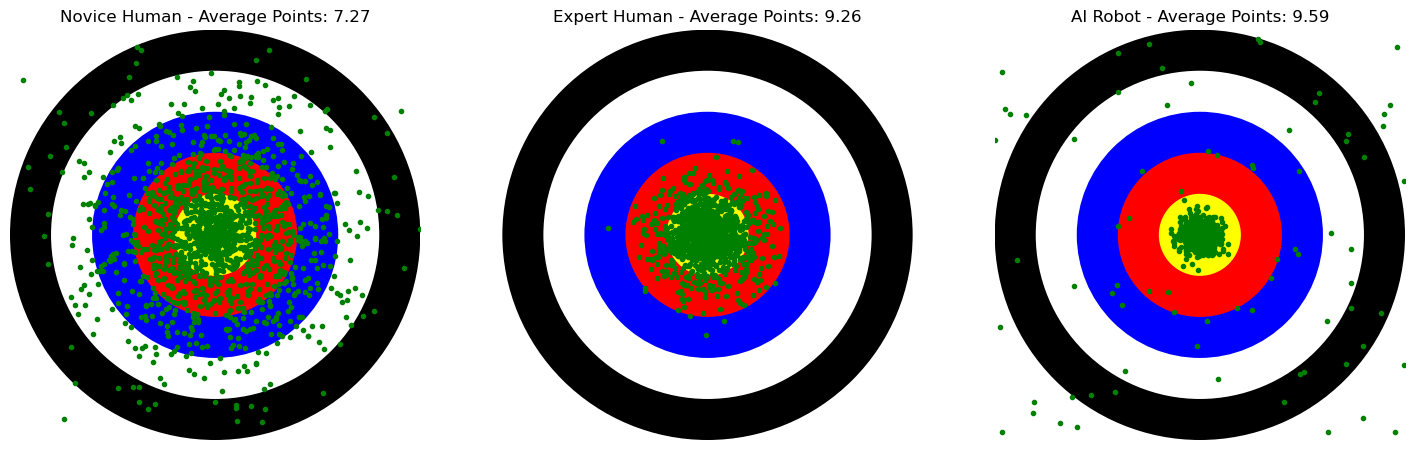

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Colors in a standard archery target (from outside to inside)
target_colors = ["black", "black", "white", "white", "blue", "blue", "red", "red", "yellow", "yellow"]

# Corresponding radii for each color ring (arbitrary sizes)
radii = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]

def draw_target(ax):
    for i in range(len(target_colors)):
        circle = patches.Circle((0, 0), radius=radii[i], fc=target_colors[i])
        ax.add_patch(circle)

import random
import numpy as np

def throw_dart(sigma=sigma, mean=mean, ai=False):
    if (not ai):
        radius = np.abs(random.gauss(mean, sigma))
        angle = random.uniform(0, 2.0*np.pi)
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
    else:
        prob = random.uniform(0, 1)
        if (prob < 0.95):
            radius = np.abs(random.gauss(mean, sigma))
            angle = random.uniform(0, 2.0*np.pi)
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
        else:
            x = random.uniform(-100, 100)
            y = random.uniform(-100, 100)
            radius = np.sqrt(x**2 + y**2)
        
    points_for_throw = np.floor(11.0-radius/10.0)
    global total_points
    if points_for_throw < 0:
        points_for_throw = 0
    total_points += points_for_throw
    #print("Throwing dart at ({0:0.2f}, {1:0.2f}): radius = {2:0.2f}".format(x, y, radius))
    #print("Points for this throw: {0:0.0f}".format(points_for_throw))
    return (x, y)

fig, ax = plt.subplots(1,3,figsize=(18, 6))

title_string = ["Novice Human", "Expert Human", "AI Robot"]
sigmalist = [40.0, 15.0, 5.0]
ailist = [False, False, True]

nthrows = 1500

for j in range(3):
    points = []
    sigma = sigmalist[j]
    mean = 0
    for i in range(nthrows):
        points.append(throw_dart(sigma,mean,ailist[j]))
        
    # Draw the target
    draw_target(ax[j])

    # Adjust the plot limits to fit the target
    ax[j].set_xlim(-100, 100)
    ax[j].set_ylim(-100, 100)
    ax[j].set_aspect('equal', 'box')
    ax[j].axis('off')  # Hide the axis
    
    ax[j].plot([x for (x, y) in points], [y for (x, y) in points], 'g.')
    # Display the plot
    ax[j].set_title("{0} - Average Points: {1:0.2f}".format(title_string[j],total_points/nthrows))
    
    total_points = 0

plt.show()


